## A Seperate Handbook is provided with detailed discription of the Code

#### The following line is one time code for installing pandas_datareader

### Import the Necessary Libraries

In [1]:
import pandas_datareader as web
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from datetime import date


### Import data using pandas_datareader. Select data range of your choice

In [2]:
df=web.DataReader('GOOGL',data_source='yahoo',start='2012-01-01',end='2020-10-18')

## Basic EDA

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,334.409424,326.511505,326.796783,333.038025,7345647.0,333.038025
2012-01-04,335.460449,330.640656,332.847839,334.474487,5722272.0,334.474487
2012-01-05,332.317322,328.443451,331.396393,329.834839,6559234.0,329.834839
2012-01-06,330.330322,325.220215,329.904907,325.335327,5380414.0,325.335327
2012-01-09,323.823822,310.925934,323.573578,311.541534,11633555.0,311.541534


In [4]:
df.shape

(2213, 6)

/home/god/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


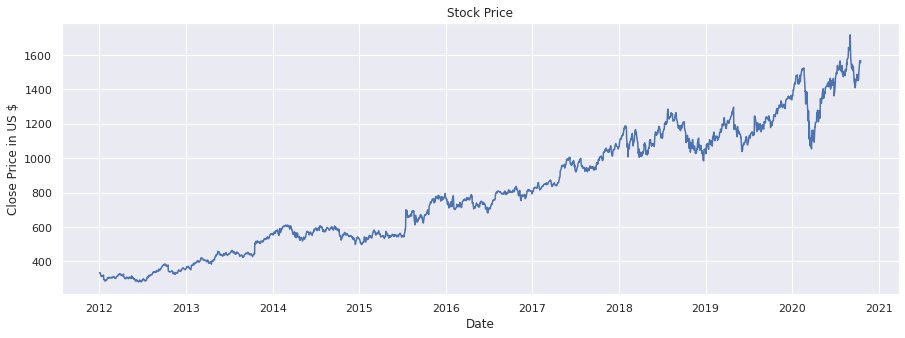

In [5]:
plt.figure(figsize=(15,5))
plt.plot(df.Close)
plt.title("Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price in US $");


## Seperate out the Close Column as we will be working on the Closing Values

In [6]:
close=df.filter(['Close'])

In [7]:
close.head()

,Close
Date,
2012-01-03,333.038025
2012-01-04,334.474487
2012-01-05,329.834839
2012-01-06,325.335327
2012-01-09,311.541534


In [8]:
# change the Values to Numpy Array
close_stock=close.values

In [9]:
type(close_stock)

numpy.ndarray

## Prepare & Scale  the Training Data

In [10]:
training_data_length=math.ceil(len(close_stock)*0.8)

In [11]:
training_data_length

1771

In [12]:
mms=MinMaxScaler(feature_range=(0, 1))

In [13]:
scaled_close_stock=mms.fit_transform(close_stock)

In [14]:
scaled_close_stock

array([[0.03702961],
       [0.03802883],
       [0.03480144],
       ...,
       [0.89291064],
       [0.88736665],
       [0.89587395]])

In [15]:
training_data=scaled_close_stock[0:training_data_length,:]

In [16]:
len(training_data)

1771

In [17]:
training_data

array([[0.03702961],
       [0.03802883],
       [0.03480144],
       ...,
       [0.53680658],
       [0.56115296],
       [0.5632398 ]])

### Make X_train & y_train

In [18]:
X_train=[]
y_train=[]

In [19]:
for i in range(60 ,len(training_data)):
    X_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])

In [20]:
type(X_train)

list

### Change X_train and y_train to NumPy arrays

In [21]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [22]:
print(type(X_train))
print(type(y_train))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
print(X_train.ndim)
print(X_train.shape)

2
(1711, 60)


In [24]:
X_train.shape[1]

60

### RNN needs data in 3 dimensions , number of Samples, Number of Time Steps and Number of Features So wee need to reshape the data

In [25]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

# Make the LSTM Architecture

In [26]:
import tensorflow


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model = Sequential()

In [29]:
X_train.shape


(1711, 60, 1)

### input_shape = number of time steps and number of features. In this case number of features is 1

In [30]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [31]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(LSTM(units = 50, return_sequences = True))
model.add(LSTM(units = 50, return_sequences = True))
model.add(LSTM(units = 50, return_sequences = True))
model.add(LSTM(units = 50, return_sequences = True))



model.add(LSTM(units = 50))


In [32]:
# Adding the output layer
model.add(Dense(units = 1))

In [33]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [34]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1711 samples
Epoch 1/50
1711/1711 [==============================] - 12s 7ms/sample - loss: 0.0141
Epoch 2/50
1711/1711 [==============================] - 10s 6ms/sample - loss: 9.0992e-04
Epoch 3/50
1711/1711 [==============================] - 10s 6ms/sample - loss: 8.4503e-04
Epoch 4/50
1711/1711 [==============================] - 10s 6ms/sample - loss: 8.3108e-04
Epoch 5/50
1711/1711 [==============================] - 13s 8ms/sample - loss: 7.7214e-04
Epoch 6/50
1711/1711 [==============================] - 12s 7ms/sample - loss: 7.7675e-04
Epoch 7/50
1711/1711 [==============================] - 12s 7ms/sample - loss: 7.9052e-04
Epoch 8/50
1711/1711 [==============================] - 12s 7ms/sample - loss: 6.9745e-04
Epoch 9/50
1711/1711 [==============================] - 11s 6ms/sample - loss: 7.0860e-04
Epoch 10/50
1711/1711 [==============================] - 11s 6ms/sample - loss

## Prepare & reshape the Test Data

In [35]:
test_data=scaled_close_stock[training_data_length-60:,:]


In [36]:
training_data_length

1771

In [37]:
len(test_data)

502

In [38]:
X_test=[]
y_test=close_stock[training_data_length:,:]

In [39]:
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [40]:
len(X_test)

442

In [41]:
X_test=np.array(X_test)

In [42]:
X_test.shape

(442, 60)

In [43]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# Make Predictions

In [93]:
y_pred=model.predict(X_test)


In [94]:
y_pred

array([[0.53974307],
       [0.5463393 ],
       [0.55095834],
       [0.5367593 ],
       [0.5355548 ],
       [0.5353097 ],
       [0.5448537 ],
       [0.5363745 ],
       [0.52931625],
       [0.5415311 ],
       [0.55952024],
       [0.55951035],
       [0.56967837],
       [0.5755949 ],
       [0.55947614],
       [0.54776657],
       [0.544706  ],
       [0.54556936],
       [0.56096536],
       [0.564592  ],
       [0.56562567],
       [0.5596074 ],
       [0.5626081 ],
       [0.559423  ],
       [0.5502694 ],
       [0.5562493 ],
       [0.55768424],
       [0.5611608 ],
       [0.56184244],
       [0.5639021 ],
       [0.5762548 ],
       [0.58014685],
       [0.58932513],
       [0.58591557],
       [0.57717437],
       [0.57617915],
       [0.5944412 ],
       [0.6064923 ],
       [0.6079906 ],
       [0.6031084 ],
       [0.60169226],
       [0.6008707 ],
       [0.61088   ],
       [0.62659657],
       [0.63189775],
       [0.6110735 ],
       [0.6072959 ],
       [0.602

In [95]:
y_pred=mms.inverse_transform(y_pred)

In [96]:
pd.DataFrame(y_pred)

,0
0,1055.731445
1,1065.213989
2,1071.854370
3,1051.442017
4,1049.710449
...,...
437,1419.429932
438,1454.720825
439,1417.168579
440,1434.505737


## Plot the Data

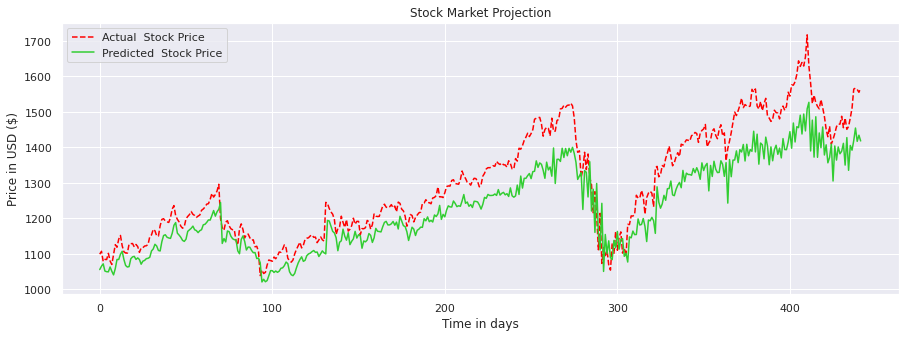

In [97]:
# Visualising the results
plt.figure(figsize=(15,5))
plt.plot(y_test, color = 'red', label = 'Actual  Stock Price',ls='--')
plt.plot(y_pred, color = 'limegreen', label = 'Predicted  Stock Price',ls='-')
plt.title('Stock Market Projection')
plt.xlabel('Time in days')
plt.ylabel('Price in USD ($)')
plt.legend()
plt.show()

## Plot the whole Data Training, Testing and Prediction Data together

In [98]:
train=close[:training_data_length]
test=close[training_data_length:]
test['pred']=y_pred

/home/god/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


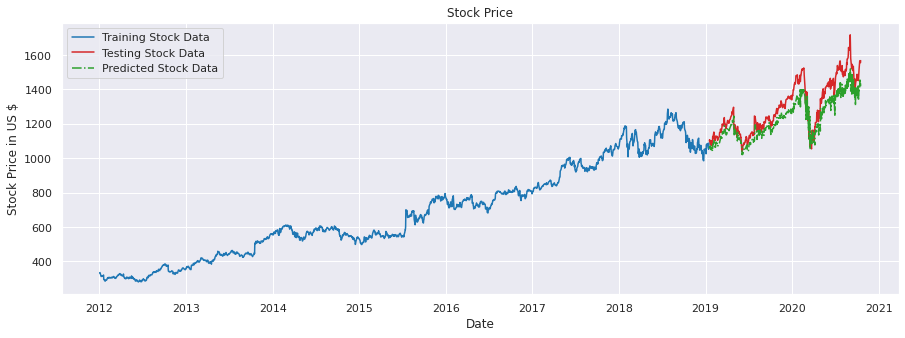

In [99]:
plt.figure(figsize=(15,5))
plt.plot(train['Close'], color = 'tab:blue', label = 'Training Stock Data',ls='-')
plt.plot(test['Close'], color = 'tab:red', label = 'Testing Stock Data',ls='-')
plt.plot(test['pred'], color = 'tab:green', label = 'Predicted Stock Data',ls='dashdot')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price in US $')
plt.legend()
plt.show()